In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
dat = pd.date_range(start="2020-01-30",end="2020-05-20")

In [4]:
dat

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', length=112, freq='D')

In [5]:
cols_to_use = ['Date', 'Total Confirmed'] # or [0,1,2,3]
dataC = pd.read_csv('case_time_series.csv', usecols= cols_to_use)

In [6]:
dataC.head()

,Date,Total Confirmed
0,30 January,1
1,31 January,1
2,01 February,1
3,02 February,2
4,03 February,3


In [7]:
dataC["Dates"] = dat

In [8]:
dataC["Total"] = dataC["Total Confirmed"]

In [9]:
dataC = dataC.drop(["Date","Total Confirmed"],axis = 1)

In [10]:
dataC.index.freq = 'MS'
dataC.head()

,Dates,Total
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [11]:
dataC.tail(4)

,Dates,Total
108,2020-05-17,95698
109,2020-05-18,100326
110,2020-05-19,106480
111,2020-05-20,112027


In [12]:
dataC.to_csv('confirm.csv', index=False) 

In [13]:
df = pd.read_csv('confirm.csv',index_col='Dates',parse_dates=True)

In [14]:
df.index.freq = 'D'
df.head()

,Total
Dates,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


In [15]:
train_data = df.iloc[:113] 
test_data = df.iloc[76:]

In [16]:
train_data.shape

(112, 1)

In [17]:
test_data.shape

(36, 1)

In [18]:
train_data.head(5)

,Total
Dates,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
fitted_model = ExponentialSmoothing(train_data['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [21]:
test_predictions = fitted_model.forecast(36).rename('Confirm Cases Prediction') 

In [22]:
test_predictions

2020-05-21    118922.889881
2020-05-22    126088.836712
2020-05-23    131581.677687
2020-05-24    136726.628088
2020-05-25    142621.767750
2020-05-26    148248.279465
2020-05-27    159294.121322
2020-05-28    167670.500269
2020-05-29    176541.380650
2020-05-30    185380.046586
2020-05-31    196619.182682
2020-06-01    208865.868028
2020-06-02    219143.899971
2020-06-03    232348.872851
2020-06-04    242470.747574
2020-06-05    251951.550616
2020-06-06    262814.756999
2020-06-07    273182.952068
2020-06-08    293537.560550
2020-06-09    308973.044431
2020-06-10    325319.765613
2020-06-11    341607.123965
2020-06-12    362317.923364
2020-06-13    384885.373510
2020-06-14    403825.108377
2020-06-15    428158.432758
2020-06-16    446810.410558
2020-06-17    464281.060283
2020-06-18    484299.119173
2020-06-19    503405.001189
2020-06-20    540913.241104
2020-06-21    569356.816089
2020-06-22    599479.563991
2020-06-23    629492.921663
2020-06-24    667657.528632
2020-06-25    709243

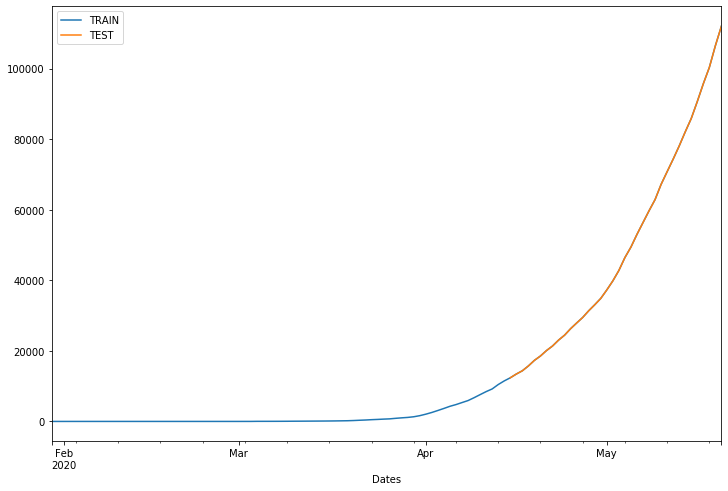

In [23]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))

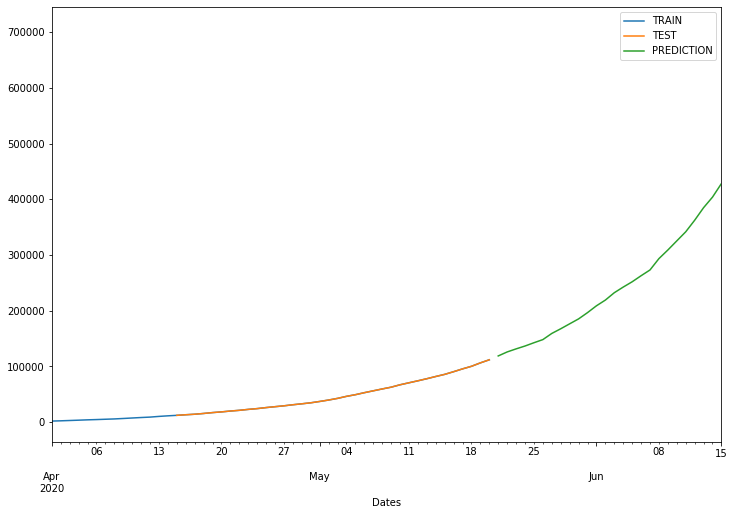

In [24]:
train_data['Total'].plot(legend=True,label='TRAIN')
test_data['Total'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-01','2020-06-15']) #Specify Date to see prediction

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mean_absolute_error(test_data,test_predictions)

279705.9003781278

In [27]:
mean_squared_error(test_data,test_predictions)

97902601227.80452

In [28]:
np.sqrt(mean_squared_error(test_data,test_predictions))

312893.9136956878

In [29]:
test_data.describe()

,Total
count,36.000000
mean,49295.138889
std,29779.478113
min,12371.000000
25%,24096.000000
50%,41302.000000
75%,71658.500000
max,112027.000000


In [30]:
final_model = ExponentialSmoothing(df['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [31]:
forecast_predictions = final_model.forecast(36)

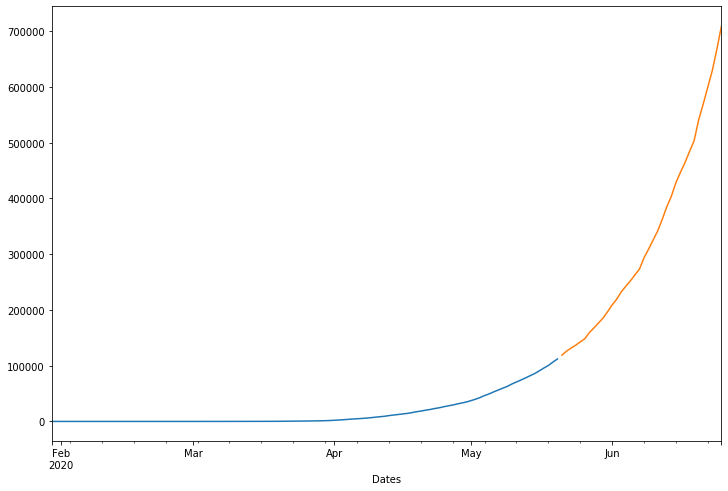

In [32]:
df['Total'].plot(figsize=(12,8))
forecast_predictions.plot()